# web scraping

1. Como usar python para solicitar información de un servidor web
2. Como realizar el manejo basico de la respuesta del servidor 
3. Como comenzar a interactuar con un sitio web de forma automatizada
4. Construir scrapers que pueden saltar de un dominio a otro para recopilar información y almacenarla para su uso posterior.

## Infraestructura requerida para tener información en tu navegador
Alicia tiene un servidor web, Bob usa una computadora de escritorio, el cual intenta conectarse al servidor de alice. Cuando una maquina quiere conectarse a otra maquina:   

1. La computadora de Bob envía un flujo de 1 y 0 bits,indicado por alto y voltajes bajos en un cable.Estos bits forman alguna información, que contiene un encabezado y cuerpo.El encabezado contiene un destino inmediato de su local, dirección MAC del enrutador,con un destino final de la dirección IP de Alice. Él body contiene su solicitud de la aplicación de servidor de Alice.

2. El enrutador local de Bob recibe todos estos 1 y 0 y los interpreta como un paquete,desde la propia dirección MAC de Bob,y destinado a la dirección IP de Alice.Su enrutador estampa su propia dirección IP en el paquete como la dirección IP "de" y lo envía a través de Internet.

3. El paquete de Bob atraviesa varios servidores intermediarios, que dirigen su paquete hacia la ruta física/cableada correcta, al servidor de Alice.

4. El servidor de Alice recibe el paquete en su dirección IP.

5. El servidor de Alice lee el destino del puerto del paquete (casi siempre el puerto 80 para aplicaciones web, esto se puede considerar como algo así como un "apartamento número” para paquetes de datos, donde la dirección IP es la “dirección de la calle”), en el encabezado, y lo pasa a la aplicación adecuada: el servidor web solicitud.

6. La aplicación del servidor web recibe un flujo de datos del servidor procesador. Estos datos dicen algo como: Esta es una solicitud de obtención,Se solicita el siguiente archivo: index.html

7. El servidor web localiza el archivo HTML correcto, lo agrupa en un nuevo paquete para enviar a Bob, y lo envía a través de su enrutador local, para el transporte de vuelta a la máquina de Bob, a través del mismo proceso.

**El navegador web es una aplicación muy útil para crear estos paquetes de
información, enviarlos e interpretar los datos que recibe como bastante
imágenes, sonidos, videos y texto. Sin embargo, un navegador web es solo código, y el código
se puede desarmar, dividir en sus componentes básicos, reescribir, reutilizar y hacer
para hacer lo que queramos.

In [1]:
from urllib.request import urlopen
html=urlopen("https://pythonscraping.com/pages/page1.html")
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


# Libreria Beautifulsoup

Ayuda a formatear y organizar la web desordenada arreglando HTML incorrecto y
presentándonos objetos de Python fácilmente transitables que representan estructuras XML.

In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install csv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/exercises/exercise1.html")
bsObj = BeautifulSoup(html.read());
print(bsObj.h1)

<h1>An Interesting Title</h1>


In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/exercises/exercise1.html")
bsObj = BeautifulSoup(html.read());
print(bsObj.div)

<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>


In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen("http://www.pythonscraping.com/exercises/exercise1.html")
bsObj = BeautifulSoup(html.read());
print(bsObj.head)

<head>
<title>A Useful Page</title>
</head>


In [23]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
try:
    html=urlopen("http://www.pythonscraping.com/exercises/exercise1.html")
except HTTPError as e:
    print(e)
    
    


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [18]:
print(bsObj.nonExistentTag)

None


C:\Users\EFE\Anaconda3_2011.11\lib\site-packages\bs4\element.py:1524: UserWarning: .nonExistentTag is deprecated, use .find("nonExistent") instead. If you really were looking for a tag called nonExistentTag, use .find("nonExistentTag")
  warnings.warn(


# Función para obtener el titulo en una pagina web

In [28]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup


def getTittle(url):
    try:
        html=urlopen(url) 
    except HTTPError as e: #en caso de que la pagina no se encuentre el servidor
        return None        #o hubo algunos error en la recuperación 
                           #bota la excepción HTTPERROR
                           #si el servidor no es encontrado o esta escrito mal 
                           #el url de la pagina web retornara un None 
    try:
            bsObj=BeautifulSoup(html.read())
            title=bsObj.h1
    except AttributeError as e: 
         return None
    return title

#Aunque si la pagina ya se ha recuperado pero todavia esta el problema de que
#el contenido de la pagina no sea lo que esperamos, cada vez que accedas a
#un Tag en BeautifulSoup object, es inteligente agregar un check para estar
#seguro que el Tag aun existe.

Si tu intentas acceder a un Tag que no existe, BeautifulSoup retornara un **None** object.El problema es intentando acceder a un **Tag**(h1 u otras etiquetas html) en un **None** object en si mismo resultara que retorne un **AttributeError**.

La siguiente línea (donde **nonExistentTag** es una etiqueta inventada, no el nombre de un función real BeautifulSoup):

print(bsObj.nonExistentTag) retornara un None
print(bsObj.nonExistentTag.someTag) retornara un AttributeError

In [27]:
title=getTittle("http://www.pythonscraping.com/exercises/exercise1.html")
if title==None:
    print("title couldn't be found")
else:
    print(title)

<h1>An Interesting Title</h1>


# Analizando Web scraping

debemos tomar una actitud cuando se trata de extraer la información que estamos buscando de páginas web complicadas.Hay muchas técnicas para eliminar el contenido que no se parece al contenido que estamos buscando, hasta que llegamos al información que estamos buscando. En este capítulo, veremos el análisis complicado de páginas HTML para extraer sólo la información que buscamos.

Antes de comenzar, echemos un vistazo a algunas de las formas en que puede evitar por completo la necesidad de un análisis HTML avanzado. Digamos que tienes algún contenido de destino. Tal vez sea un nombre, una estadística o un bloque de texto. Tal vez esté enterrado a 20 etiquetas de profundidad en una papilla HTML sin etiquetas útiles o Atributos HTML que se van a encontrar. Digamos que te sumerges y escribes algo como la siguiente línea para intentar la extracción:

**bsObj.findAll("table")[4].findAll("tr")[2].find("td").findAll("div")
[1].find("a")**

Los rastreadores web pueden separar fácilmente estas dos etiquetas diferentes en función de su clase; por ejemplo, podrían usar BeautifulSoup para tomar todo el texto **rojo** pero ninguno de los texto verde Porque **CSS** se basa en estos atributos de identificación para diseñar sitios apropiadamente, está casi garantizado que estos atributos de clase e ID serán abundante en la mayoría de los sitios web modernos. some tags might look like this:

En esta página,**las líneas habladas por los personajes de la historia están en rojo**, mientras que las los **nombres de los propios personajes están en verde**. Puede ver las etiquetas de intervalo, que haga referencia a las clases de CSS apropiadas, en la siguiente muestra de la fuente de la página código:


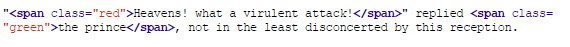

In [31]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/warandpeace.html")                                
bsObj = BeautifulSoup(html)

In [33]:
nameList = bsObj.findAll("span", {"class":"green"})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


Cuando se ejecuta, debe enumerar todos los nombres propios en el texto, en el orden en que aparecen en
Guerra y paz. 

Entonces, ¿qué está pasando aquí? Anteriormente, hemos llamado **bsObj.tagName** para obtener la primera aparición de esa etiqueta en la página. Ahora, estamos llamando a **bsObj.findAll(tagName, tagAttributes)** para obtener una lista de todas las etiquetas de la página, en lugar de solo la primera.Después de obtener una lista de nombres, el programa itera a través de todos los nombres en la lista y **imprime name.get_text()** para separar el contenido de las etiquetas.

**.get_text()** elimina todas las etiquetas del documento con el que está trabajando y devuelve
una cadena que contiene solo el texto la libreria BeautifulSoup es el mejor buscador para retornar el texto junto con de las etiquetas de la pagina web,el **.get_text()** deberia ser lo ultimo que haga en su codificación. 

# find() and findAll() with BeautifulSoup

**Find()** y **findAll()** de BeautifulSoup son las dos funciones que probablemente usará la mayoría Con ellos, puede filtrar fácilmente páginas HTML para encontrar listas de etiquetas deseadas,o una sola etiqueta, en función de sus diversos atributos.

findAll(tag, attributes, recursive, text, limit, keywords)

find(tag, attributes, recursive, text, keywords)

El argumento de la etiqueta es uno que hemos visto antes: puede pasar un nombre de cadena de un etiqueta o incluso una lista de Python de nombres de etiquetas de cadena. Por ejemplo, lo siguiente devolverá una lista de todas las etiquetas de encabezado en un documento.
**.findAll({"h1","h2","h3","h4","h5","h6"})**





El argumento de **attributes** toma un diccionario de atributos de Python y coincide con las etiquetas que contienen cualquiera de esos atributos. Por ejemplo, la siguiente función sería devolver las etiquetas de intervalo verde y rojo en el documento HTML.

**.findAll("span", {"class":"green", "class":"red"})**

In [4]:
abc=urlopen("https://docs.python.org/3/library/urllib.html")
aspObj=BeautifulSoup(abc)
lista=aspObj.findAll(text="Python")
print(lista)

['Python', 'Python']


El argumento de **keyword** le permite seleccionar etiquetas que contienen un atributo particular. Por ejemplo:

**allText = bsObj.findAll(id="text")**


**print(allText[0].get_text())**


In [14]:
abc=urlopen("https://www.pythonscraping.com/pages/warandpeace.html")
aspObj=BeautifulSoup(abc)
lista=aspObj.findAll("span", {"class":"red"})
arr=[]
for m in lista:
    arr.append(m.get_text())
    

AttributeError: 'str' object has no attribute 'get_text'